In [183]:
from datetime import datetime, timedelta
import pandas as pd
import matplotlib.pyplot as plt
from arch import arch_model
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import numpy as np
from statsmodels.tsa.stattools import adfuller

In [196]:
df=pd.read_csv('Stock Price Data.csv',index_col=0)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
31/12/2009,37.068000,37.131000,36.948751,36.998249,36.998249,4892780.4
4/01/2010,37.187250,37.394250,37.092751,37.234500,37.234500,7115420.4
5/01/2010,37.151249,37.275000,36.780001,37.162500,37.162500,7148180.4
6/01/2010,37.218750,37.275000,37.045501,37.133251,37.133251,4610180.4
7/01/2010,37.166999,37.263749,36.946500,37.059000,37.059000,4356020.4


In [197]:
df.index.sort_values()

Index(['1/02/2010', '1/02/2011', '1/02/2012', '1/02/2013', '1/02/2016',
       '1/02/2017', '1/02/2018', '1/03/2010', '1/03/2011', '1/03/2012',
       ...
       '9/11/2015', '9/11/2016', '9/11/2017', '9/11/2018', '9/12/2010',
       '9/12/2011', '9/12/2013', '9/12/2014', '9/12/2015', '9/12/2016'],
      dtype='object', name='Date', length=2265)

In [198]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
31/12/2009,37.068000,37.131000,36.948751,36.998249,36.998249,4892780.4
4/01/2010,37.187250,37.394250,37.092751,37.234500,37.234500,7115420.4
5/01/2010,37.151249,37.275000,36.780001,37.162500,37.162500,7148180.4
6/01/2010,37.218750,37.275000,37.045501,37.133251,37.133251,4610180.4
7/01/2010,37.166999,37.263749,36.946500,37.059000,37.059000,4356020.4


In [199]:
df.index = pd.to_datetime(df.index,format='%d/%m/%Y')

In [200]:
df_final = df.drop(['Open','High','Low','Adj Close','Volume'],axis=1)

In [201]:
df_final.head()

,Close
Date,
2009-12-31,36.998249
2010-01-04,37.234500
2010-01-05,37.162500
2010-01-06,37.133251
2010-01-07,37.059000


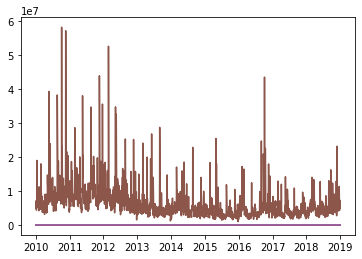

In [202]:
plt.plot(df)

In [203]:
df_final = pd.Series(df_final['Close'])

In [204]:
def check_stat(ts_data):
    roll_mean = ts_data.rolling(30).mean()
    roll_std = ts_data.rolling(5).std()
    
    fig = plt.figure(figsize=(20,10))
    plt.subplot(211)
    plt.plot(ts_data,color='blue',label='Original Data')
    plt.plot(roll_mean,color='red',label='Rolling Mean for 30 days')
    
    plt.legend()
    plt.subplot(212)
    plt.plot(roll_std,color='green',label = 'Rolling std for 5 days')
    
    print('Dickey-Fuller test results\n')
    df_test = adfuller(ts_data,regresults=False)
    test_results = pd.Series(df_test[0:4],index=['Test stats','p-val','num of lags','num of obs'])
    print(test_results)
    for i,j in df_test[4].items():
        print('Critical value at %s: %1.5f'%(i,j))

Dickey-Fuller test results

Test stats        0.279036
p-val             0.976362
num of lags      24.000000
num of obs     2240.000000
dtype: float64
Critical value at 1%: -3.43327
Critical value at 5%: -2.86283
Critical value at 10%: -2.56746


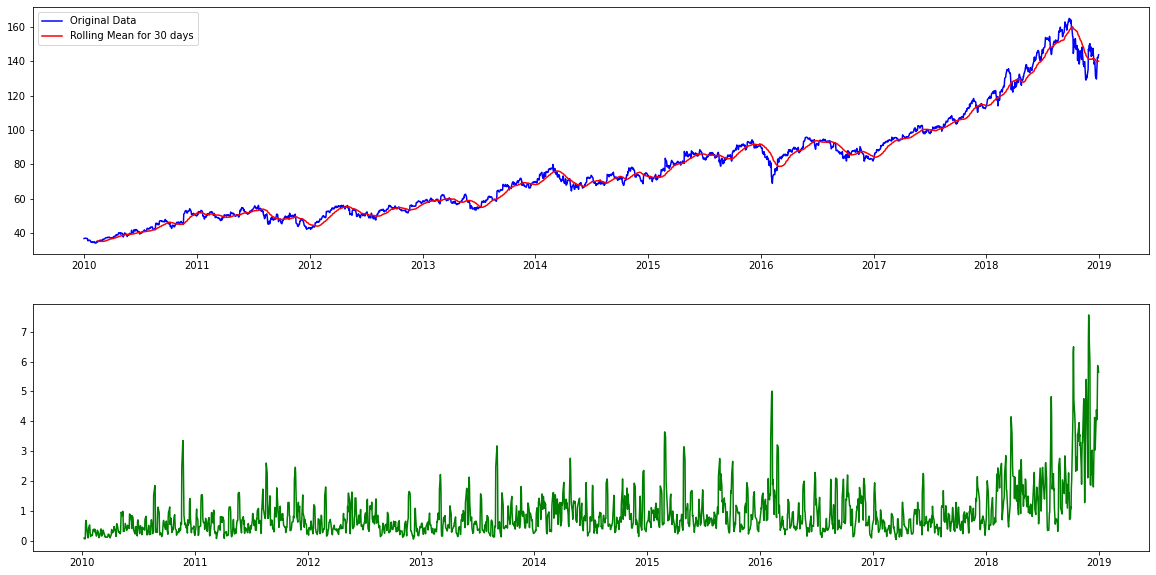

In [205]:
check_stat(df_final)
#not stationary as p-val is large

In [206]:
df_final_log = np.log(df_final)
df_final_log.head()

Date
2009-12-31    3.610871
2010-01-04    3.617236
2010-01-05    3.615300
2010-01-06    3.614513
2010-01-07    3.612511
Name: Close, dtype: float64

In [207]:
df_final_log.isnull().sum()

0

Dickey-Fuller test results

Test stats       -0.768680
p-val             0.828149
num of lags       3.000000
num of obs     2261.000000
dtype: float64
Critical value at 1%: -3.43325
Critical value at 5%: -2.86282
Critical value at 10%: -2.56745


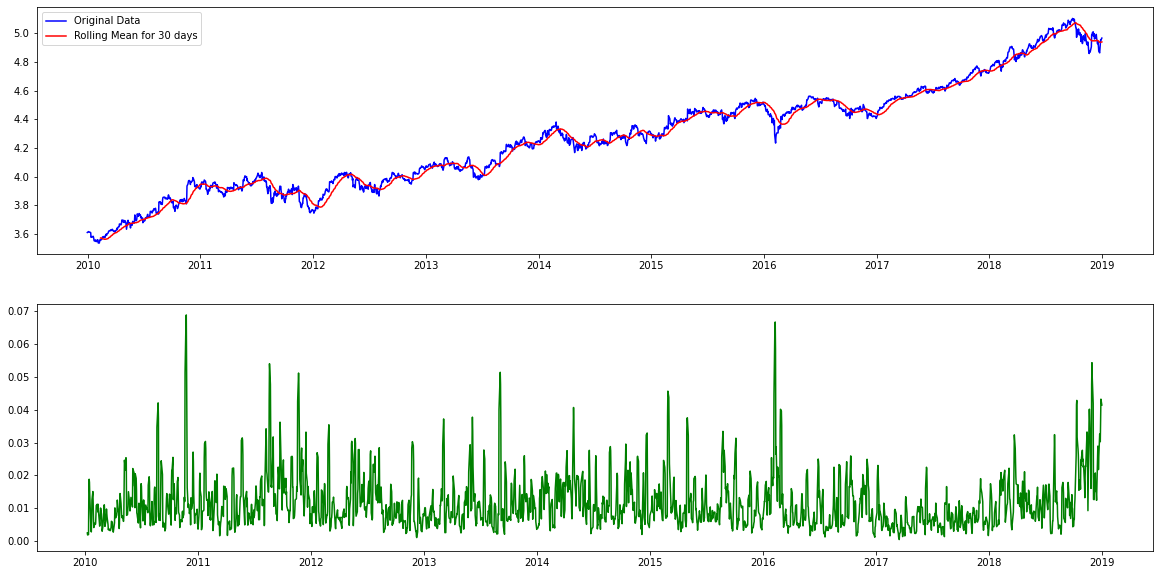

In [208]:
check_stat(df_final_log)
#still not stationary

In [209]:
df_final_log_diff = df_final_log - df_final_log.shift()
df_final_log_diff.head()

Date
2009-12-31         NaN
2010-01-04    0.006365
2010-01-05   -0.001936
2010-01-06   -0.000787
2010-01-07   -0.002002
Name: Close, dtype: float64

In [210]:
df_final_log_diff.isnull().sum()

1

In [211]:
df_final_log_diff.dropna(inplace=True)
df_final_log_diff.head()

Date
2010-01-04    0.006365
2010-01-05   -0.001936
2010-01-06   -0.000787
2010-01-07   -0.002002
2010-01-08    0.000668
Name: Close, dtype: float64

Dickey-Fuller test results

Test stats      -29.233852
p-val             0.000000
num of lags       2.000000
num of obs     2261.000000
dtype: float64
Critical value at 1%: -3.43325
Critical value at 5%: -2.86282
Critical value at 10%: -2.56745


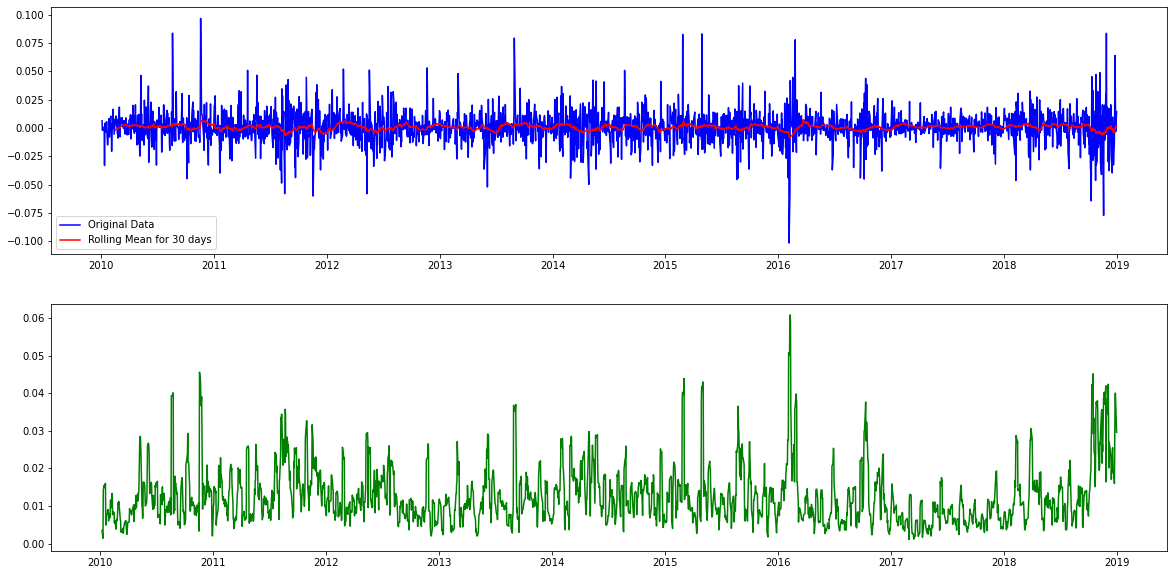

In [212]:
check_stat(df_final_log_diff)
#stationary

In [213]:
df_final_diff = df_final - df_final.shift()
df_final_diff.head()

Date
2009-12-31         NaN
2010-01-04    0.236251
2010-01-05   -0.072000
2010-01-06   -0.029249
2010-01-07   -0.074250
Name: Close, dtype: float64

Dickey-Fuller test results

Test stats    -9.068491e+00
p-val          4.366597e-15
num of lags    2.700000e+01
num of obs     2.236000e+03
dtype: float64
Critical value at 1%: -3.43328
Critical value at 5%: -2.86283
Critical value at 10%: -2.56746


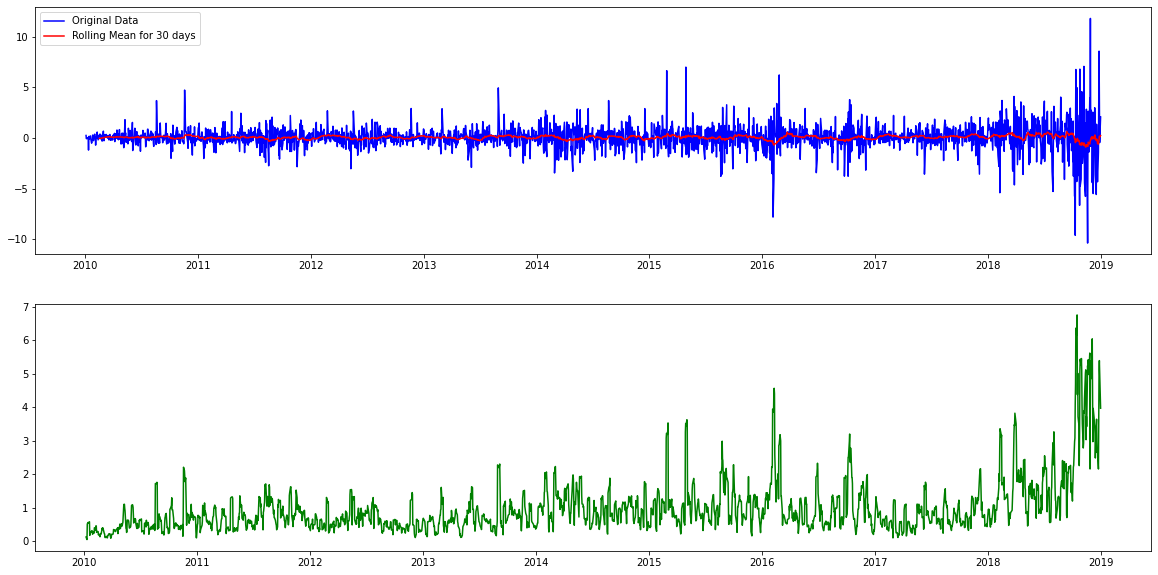

In [214]:
df_final_diff.dropna(inplace=True)
check_stat(df_final_diff)

In [215]:
from statsmodels.tsa.stattools import acf,pacf

In [216]:
df_acf = acf(df_final_diff)

/Users/dawnstaana/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:568: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


In [217]:
df_pacf = pacf(df_final_diff)

In [218]:
import statsmodels.api as sm

AttributeError: 'Figure' object has no attribute 'subplot'

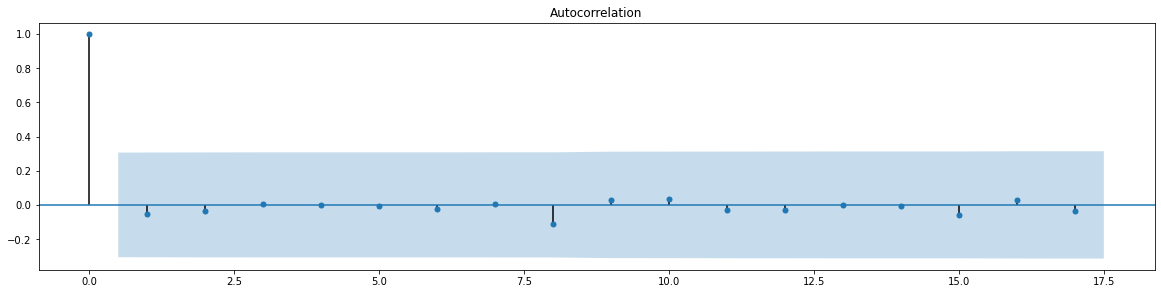

In [220]:
fig1 = plt.figure(figsize=(20,10))
ax1 = fig1.add_subplot(211)
fig1 = sm.graphics.tsa.plot_acf(df_acf,ax=ax1)
ax2 = fig1.subplot(212)
fig1 = sm.graphics.tsa.plot_pacf(df_pacf,ax=ax2)

In [305]:
model = ARIMA(df_final_diff,(1,1,0))

/Users/dawnstaana/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/dawnstaana/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


In [306]:
fit_model = model.fit(full_output=True)

In [391]:
fit_model.aic

8421.315088439407

In [307]:
preds = model.predict(fit_model.params,start=1760,end=2114)

In [308]:
fit_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Close   No. Observations:                 2263
Model:                 ARIMA(1, 1, 0)   Log Likelihood               -4207.658
Method:                       css-mle   S.D. of innovations              1.553
Date:                Thu, 08 Oct 2020   AIC                           8421.315
Time:                        12:34:28   BIC                           8438.488
Sample:                             1   HQIC                          8427.581
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0005      0.022      0.022      0.982      -0.042       0.043
ar.L1.D.Close    -0.5058      0.018    -27.889      0.000      -0.541      -0.470
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.9771           +0.0000j            1.9771            0.5000
-----------------------------------------------------------------------------
"""

In [309]:
preds_model_diff = pd.Series(fit_model.fittedvalues,copy=True)
preds_model_diff.head()

Date
2010-01-05    0.000477
2010-01-06    0.156626
2010-01-07   -0.020904
2010-01-08    0.023479
2010-01-11   -0.049355
dtype: float64

In [310]:
pred_model_diff_cumsum = preds_model_diff.cumsum()
pred_model_diff_cumsum.head()

Date
2010-01-05    0.000477
2010-01-06    0.157103
2010-01-07    0.136199
2010-01-08    0.159677
2010-01-11    0.110323
dtype: float64

In [311]:
df_final_trans = df_final.add(pred_model_diff_cumsum,fill_value=0)
df_final_trans.tail()

Date
2018-12-24    133.532555
2018-12-26    140.617406
2018-12-27    139.493904
2018-12-28    141.370921
2018-12-31    145.654048
dtype: float64

In [312]:
final_pred = []
for i in preds:
    t=df_final[-1] + i
    final_pred.append(t)

In [313]:
final_pred

[144.0105698372778,
 143.3004478950223,
 144.0151263215227,
 142.4127998333761,
 143.59178219220948,
 144.7070361801997,
 143.20940831033838,
 144.0606461189225,
 143.737444143881,
 142.86801162031236,
 144.74344644843526,
 143.2230673844024,
 144.15168569349075,
 143.04553429531964,
 144.11526847073662,
 143.36873280068863,
 143.82393416849163,
 143.30045484954087,
 143.48708355369286,
 144.52950656078949,
 143.31865650387047,
 143.56447102388918,
 143.72379202433555,
 144.0879538226281,
 142.7314487786718,
 144.34286742738857,
 143.91953025259392,
 143.2549315774107,
 143.66006362820326,
 143.74655017808348,
 144.0014672626322,
 143.3732823405306,
 143.79207692494404,
 143.33686511777645,
 144.40204627862107,
 142.99091193844774,
 143.64640803392743,
 144.0424340252283,
 143.63275244470947,
 143.8011760198015,
 143.65095757882725,
 143.6509610484998,
 142.46742566497844,
 145.31245598391908,
 143.35962675131262,
 143.3414216171948,
 143.58722917763714,
 143.65551060351524,
 143.99691

In [299]:
from pandas import DataFrame

In [300]:
final_preds_df = DataFrame (final_pred,columns=['Close'])

In [301]:
final_preds_df

,Close
0,144.130024
1,143.407685
2,143.871382
3,142.201510
4,142.656972
...,...
350,143.417763
351,144.375656
352,141.565070
353,143.744224


In [286]:
final_preds.to_csv ('final_preds.csv', index = False, header=True)

In [288]:
subm_df = pd.read_csv('Sample Submission.csv')
subm_df['Close'] = final_pred
subm_df.to_csv('Subm_1.csv', index=False)

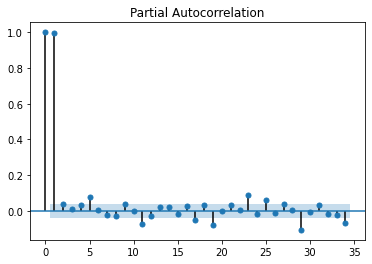

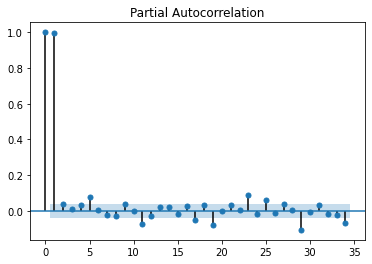

In [385]:
plot_pacf(df_final)
#q =3

In [392]:
#q=2,3 p=2,3
model2 = ARIMA(df_final,order=(2,1,3))

/Users/dawnstaana/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/dawnstaana/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


In [393]:
model2_fit = model2.fit()

In [394]:
model2_fit.aic

7399.815780659781

In [398]:
model2_forecast = model2_fit.forecast(steps=355)[0]

In [400]:
model2_forecast

array([143.58541778, 143.52718787, 143.53796979, 143.5065    ,
       143.51959677, 143.50736014, 143.52410755, 143.5259017 ,
       143.54670466, 143.55887974, 143.58364459, 143.60360056,
       143.63198941, 143.65784575, 143.68942249, 143.71979909,
       143.75411013, 143.78798017, 143.82459643, 143.8611864 ,
       143.8997226 , 143.9384433 , 143.9785645 , 144.01896285,
       144.06038405, 144.10210872, 144.14459099, 144.18736771,
       144.23071283, 144.27432626, 144.31837109, 144.36265138,
       144.4072624 , 144.45207506, 144.49714349, 144.54238171,
       144.58781918, 144.63339795, 144.67913288, 144.72498439,
       144.77095889, 144.81702898, 144.86319632, 144.90944165,
       144.95576416, 145.00215006, 145.04859735, 145.09509604,
       145.14164366, 145.18823287, 145.23486115, 145.28152303,
       145.32821613, 145.37493634, 145.42168154, 145.46844859,
       145.51523566, 145.56204032, 145.60886102, 145.65569588,
       145.70254361, 145.74940273, 145.79627216, 145.84

In [402]:
preds2_df = DataFrame(model2_forecast,columns=['Close'])
subm_df = pd.read_csv('Sample Submission.csv')
subm_df['Close'] = preds2_df
subm_df.to_csv('Subm_2.csv', index=False)

In [409]:
model3 = ARIMA(df_final,order=(3,1,3))

/Users/dawnstaana/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/dawnstaana/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


In [410]:
model3_fit = model3.fit()

In [411]:
model3_fit.aic

7391.359348973487

In [412]:
model3_forecast = model3_fit.forecast(steps=355)[0]

In [413]:
model3_forecast

array([143.71029276, 143.22500136, 143.40939827, 143.58820427,
       143.17392915, 143.26940437, 143.5407711 , 143.21293502,
       143.21877785, 143.53871776, 143.30710372, 143.23417741,
       143.5649589 , 143.43232227, 143.29896759, 143.6102296 ,
       143.57223956, 143.40063708, 143.6700661 , 143.71619497,
       143.52927644, 143.74273044, 143.85774817, 143.67673556,
       143.82780954, 143.99358212, 143.83619954, 143.92530493,
       144.12264406, 144.00200406, 144.03508366, 144.24544783,
       144.1695701 , 144.15659393, 144.3634979 , 144.33538017,
       144.28877129, 144.47881604, 144.49694897, 144.43007548,
       144.59356285, 144.65276413, 144.5786092 , 144.70974987,
       144.80218859, 144.73227929, 144.82903855, 144.94532712,
       144.88896898, 144.95261981, 145.08286634, 145.04669759,
       145.08116553, 145.21590099, 145.20375137, 145.21484034,
       145.34576017, 145.35877603, 145.35336015, 145.4738462 ,
       145.51082707, 145.49608323, 145.60149642, 145.65

In [414]:
preds3_df = DataFrame(model3_forecast,columns=['Close'])
subm_df = pd.read_csv('Sample Submission.csv')
subm_df['Close'] = preds3_df
subm_df.to_csv('Subm_3.csv', index=False)